In [17]:
import random
import time

def generate_cities(num_cities):
    cities = []
    for _ in range(num_cities):
        x = random.randint(-100, 100)
        y = random.randint(-100, 100)
        z = random.randint(0, 50)
        cities.append((x, y, z))
    return cities

# Example: Generate 5 cities
cities = generate_cities(7)
print("Generated cities:", cities)


Generated cities: [(-35, 71, 29), (-48, 69, 10), (-25, 22, 18), (60, -78, 24), (56, -85, 30), (-24, 14, 34), (-51, 52, 10)]


In [18]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def calculate_distance(city1, city2):
    x1, y1, z1 = city1
    x2, y2, z2 = city2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

def create_graph(cities, connections_percentage=1.0, symmetrical=True):
    num_cities = len(cities)
    graph = {i: {} for i in range(num_cities)}
    
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            if random.random() < connections_percentage:
                cost = calculate_distance(cities[i], cities[j])
                if symmetrical:
                    # Adjust cost for asymmetrical scenario
                    cost *= 1.1 if cities[i][2] < cities[j][2] else 0.9
                graph[i][j] = cost
                graph[j][i] = cost
    
    return graph

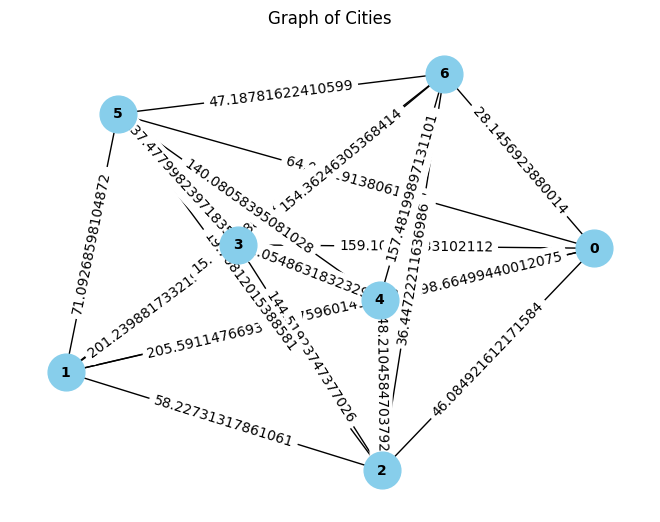

In [19]:
def tsp_bfs(graph, start):
    queue = [(start, [start], 0)]
    num_cities = len(graph)
    shortest_path = None
    min_cost = float('inf')

    while queue:
        current_city, path, cost = queue.pop(0)

        if len(path) == num_cities and start in graph[current_city]:
            # Return to starting city
            cost += graph[current_city][start]
            if cost < min_cost:
                shortest_path = path + [start]
                min_cost = cost
        else:
            for neighbor, edge_cost in graph[current_city].items():
                if neighbor not in path:
                    new_path = path + [neighbor]
                    new_cost = cost + edge_cost
                    queue.append((neighbor, new_path, new_cost))

    return shortest_path, min_cost

def tsp_dfs(graph, start):
    stack = [(start, [start], 0)]
    num_cities = len(graph)
    shortest_path = None
    min_cost = float('inf')

    while stack:
        current_city, path, cost = stack.pop()

        if len(path) == num_cities and start in graph[current_city]:
            # Return to starting city
            cost += graph[current_city][start]
            if cost < min_cost:
                shortest_path = path + [start]
                min_cost = cost
        else:
            for neighbor, edge_cost in graph[current_city].items():
                if neighbor not in path:
                    new_path = path + [neighbor]
                    new_cost = cost + edge_cost
                    stack.append((neighbor, new_path, new_cost))

    return shortest_path, min_cost

#Tworzenie grafu
graph = create_graph(cities, connections_percentage=1.0, symmetrical=True)

# Rysowanie grafu
G = nx.Graph()
for i, neighbors in graph.items():
    for j, cost in neighbors.items():
        G.add_edge(i, j, weight=cost)

pos = nx.spring_layout(G)  # Ustalenie pozycji węzłów
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph of Cities")
plt.show()



BFS:
  Shortest path: [0, 3, 1, 4, 5, 2, 6, 0]
  Minimum cost: 590.2356412651745
DFS:
  Shortest path: [0, 6, 2, 5, 4, 1, 3, 0]
  Minimum cost: 590.2356412651745


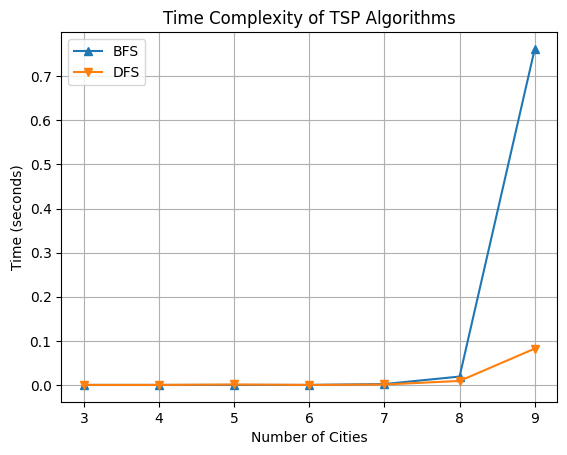

In [20]:
def tsp_bfs(graph, start):
    queue = [(start, [start], 0)]
    num_cities = len(graph)
    shortest_path = None
    min_cost = float('inf')

    while queue:
        current_city, path, cost = queue.pop(0)

        if len(path) == num_cities and start in graph[current_city]:
            # Return to starting city
            cost += graph[current_city][start]
            if cost < min_cost:
                shortest_path = path + [start]
                min_cost = cost
        else:
            for neighbor, edge_cost in graph[current_city].items():
                if neighbor not in path:
                    new_path = path + [neighbor]
                    new_cost = cost + edge_cost
                    queue.append((neighbor, new_path, new_cost))

    return shortest_path, min_cost

def tsp_dfs(graph, start):
    stack = [(start, [start], 0)]
    num_cities = len(graph)
    shortest_path = None
    min_cost = float('inf')

    while stack:
        current_city, path, cost = stack.pop()

        if len(path) == num_cities and start in graph[current_city]:
            # Return to starting city
            cost += graph[current_city][start]
            if cost < min_cost:
                shortest_path = path + [start]
                min_cost = cost
        else:
            for neighbor, edge_cost in graph[current_city].items():
                if neighbor not in path:
                    new_path = path + [neighbor]
                    new_cost = cost + edge_cost
                    stack.append((neighbor, new_path, new_cost))

    return shortest_path, min_cost


# Generowanie danych i obliczanie czasu wykonania dla 10 miast
num_cities = 7
cities = generate_cities(num_cities)
graph = create_graph(cities, connections_percentage=1.0, symmetrical=True)

# BFS
shortest_path_bfs, min_cost_bfs = tsp_bfs(graph, 0)
print("BFS:")
print("  Shortest path:", shortest_path_bfs)
print("  Minimum cost:", min_cost_bfs)

# DFS
shortest_path_dfs, min_cost_dfs = tsp_dfs(graph, 0)
print("DFS:")
print("  Shortest path:", shortest_path_dfs)
print("  Minimum cost:", min_cost_dfs)

# Measure execution time for each algorithm
num_cities_range = range(3, 10)
times_bfs = []
times_dfs = []

for num_cities in num_cities_range:
    cities = generate_cities(num_cities)
    graph = create_graph(cities, connections_percentage=1.0, symmetrical=True)
    
    start_city = 0

    
    start_time = time.time()
    tsp_bfs(graph, start_city)
    end_time = time.time()
    times_bfs.append(end_time - start_time)
    
    start_time = time.time()
    tsp_dfs(graph, start_city)
    end_time = time.time()
    times_dfs.append(end_time - start_time)
    


plt.plot(num_cities_range, times_bfs, marker='^', label='BFS')
plt.plot(num_cities_range, times_dfs, marker='v', label='DFS')
plt.xlabel('Number of Cities')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of TSP Algorithms')
plt.legend()
plt.grid(True)
plt.show()
